<a href="https://colab.research.google.com/github/avikalsagar/Predicting_Annual_Variability_Renewable_Energy/blob/main/4_XGBoosted_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import dates as md
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import graphviz

In [ ]:
data = pd.read_csv("Final 2018,20,21 data.csv")

In [ ]:
data.head(5)

,date_time,surface_net_solar_radiation,temperature_2m,total_precipitation,u_component_of_wind_10m,Hour,Load,Coal,Diesel,Hydro,Gas,Nuclear,Solar,Waste,Wind,Waste heat,Other,Date
0,01-01-2018 01:00,0.0,254.192533,4.440000e-08,1.074556,1.0,435175.406,252979.6,8.8,8437.6,115428.1,24410.6,0.0,130.8,41819.9,0.0,326.9,01-01-2018
1,01-01-2018 02:00,0.0,253.602073,4.540000e-08,1.023605,2.0,433136.664,254174.5,0.0,6373.6,109497.4,24414.7,1.4,130.3,38397.5,0.0,326.2,01-01-2018
2,01-01-2018 03:00,0.0,253.110512,4.540000e-08,0.942507,3.0,432544.152,254355.6,0.0,6355.1,111666.6,24408.1,14.2,131.1,38098.6,0.0,325.1,01-01-2018
3,01-01-2018 04:00,0.0,252.674437,4.540000e-08,0.921040,4.0,432570.416,255091.5,0.0,6351.8,109633.5,24413.0,54.7,131.9,37790.8,0.0,327.5,01-01-2018
4,01-01-2018 05:00,0.0,252.256571,4.540000e-08,0.947823,5.0,436211.546,253726.0,0.0,6511.0,119693.8,24413.1,91.1,131.0,35006.1,0.0,326.5,01-01-2018


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['Day'] = data['date_time'].dt.day
data['Month'] = data['date_time'].dt.month

In [ ]:
data.set_index('date_time', inplace=True)
data = data.sort_index()
data = data[~data.index.duplicated(keep='first')]
data = data.drop('Date', axis=1)
data

,surface_net_solar_radiation,temperature_2m,total_precipitation,u_component_of_wind_10m,Hour,Load,Coal,Diesel,Hydro,Gas,Nuclear,Solar,Waste,Wind,Waste heat,Other,Day,Month
date_time,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,0.0,254.192533,4.440000e-08,1.074556,1.0,435175.406,252979.6,8.8,8437.6,115428.1,24410.6,0.0,130.8,41819.9,0.0,326.9,1,1
2018-01-01 02:00:00,0.0,253.602073,4.540000e-08,1.023605,2.0,433136.664,254174.5,0.0,6373.6,109497.4,24414.7,1.4,130.3,38397.5,0.0,326.2,1,1
2018-01-01 03:00:00,0.0,253.110512,4.540000e-08,0.942507,3.0,432544.152,254355.6,0.0,6355.1,111666.6,24408.1,14.2,131.1,38098.6,0.0,325.1,1,1
2018-01-01 04:00:00,0.0,252.674437,4.540000e-08,0.921040,4.0,432570.416,255091.5,0.0,6351.8,109633.5,24413.0,54.7,131.9,37790.8,0.0,327.5,1,1
2018-01-01 05:00:00,0.0,252.256571,4.540000e-08,0.947823,5.0,436211.546,253726.0,0.0,6511.0,119693.8,24413.1,91.1,131.0,35006.1,0.0,326.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,4061524.0,269.510712,8.520000e-07,-0.872406,19.0,369182.601,90605.8,0.0,11651.7,28258.4,24489.6,0.0,152.2,221667.0,0.0,217.1,31,12
2021-12-31 20:00:00,4924492.0,269.584656,8.520000e-07,-1.601669,20.0,361129.679,85560.6,0.0,11665.2,27978.8,24491.4,0.0,151.8,224758.4,0.0,215.8,31,12
2021-12-31 21:00:00,5640718.0,269.483490,8.520000e-07,-2.133556,21.0,354789.218,85789.5,0.0,9837.1,28306.0,24500.4,0.0,152.1,219539.1,0.0,213.6,31,12


In [ ]:
data = data.dropna(subset=[' Load'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26295 entries, 2018-01-01 01:00:00 to 2021-12-31 23:00:00
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surface_net_solar_radiation  26295 non-null  float64
 1   temperature_2m               26295 non-null  float64
 2   total_precipitation          26295 non-null  float64
 3   u_component_of_wind_10m      26295 non-null  float64
 4   Hour                         26295 non-null  float64
 5    Load                        26295 non-null  float64
 6   Coal                         26295 non-null  float64
 7   Diesel                       26295 non-null  float64
 8   Hydro                        26295 non-null  float64
 9   Gas                          26295 non-null  float64
 10  Nuclear                      26295 non-null  float64
 11  Solar                        26295 non-null  float64
 12  Waste                        26295 non-

<Axes: >

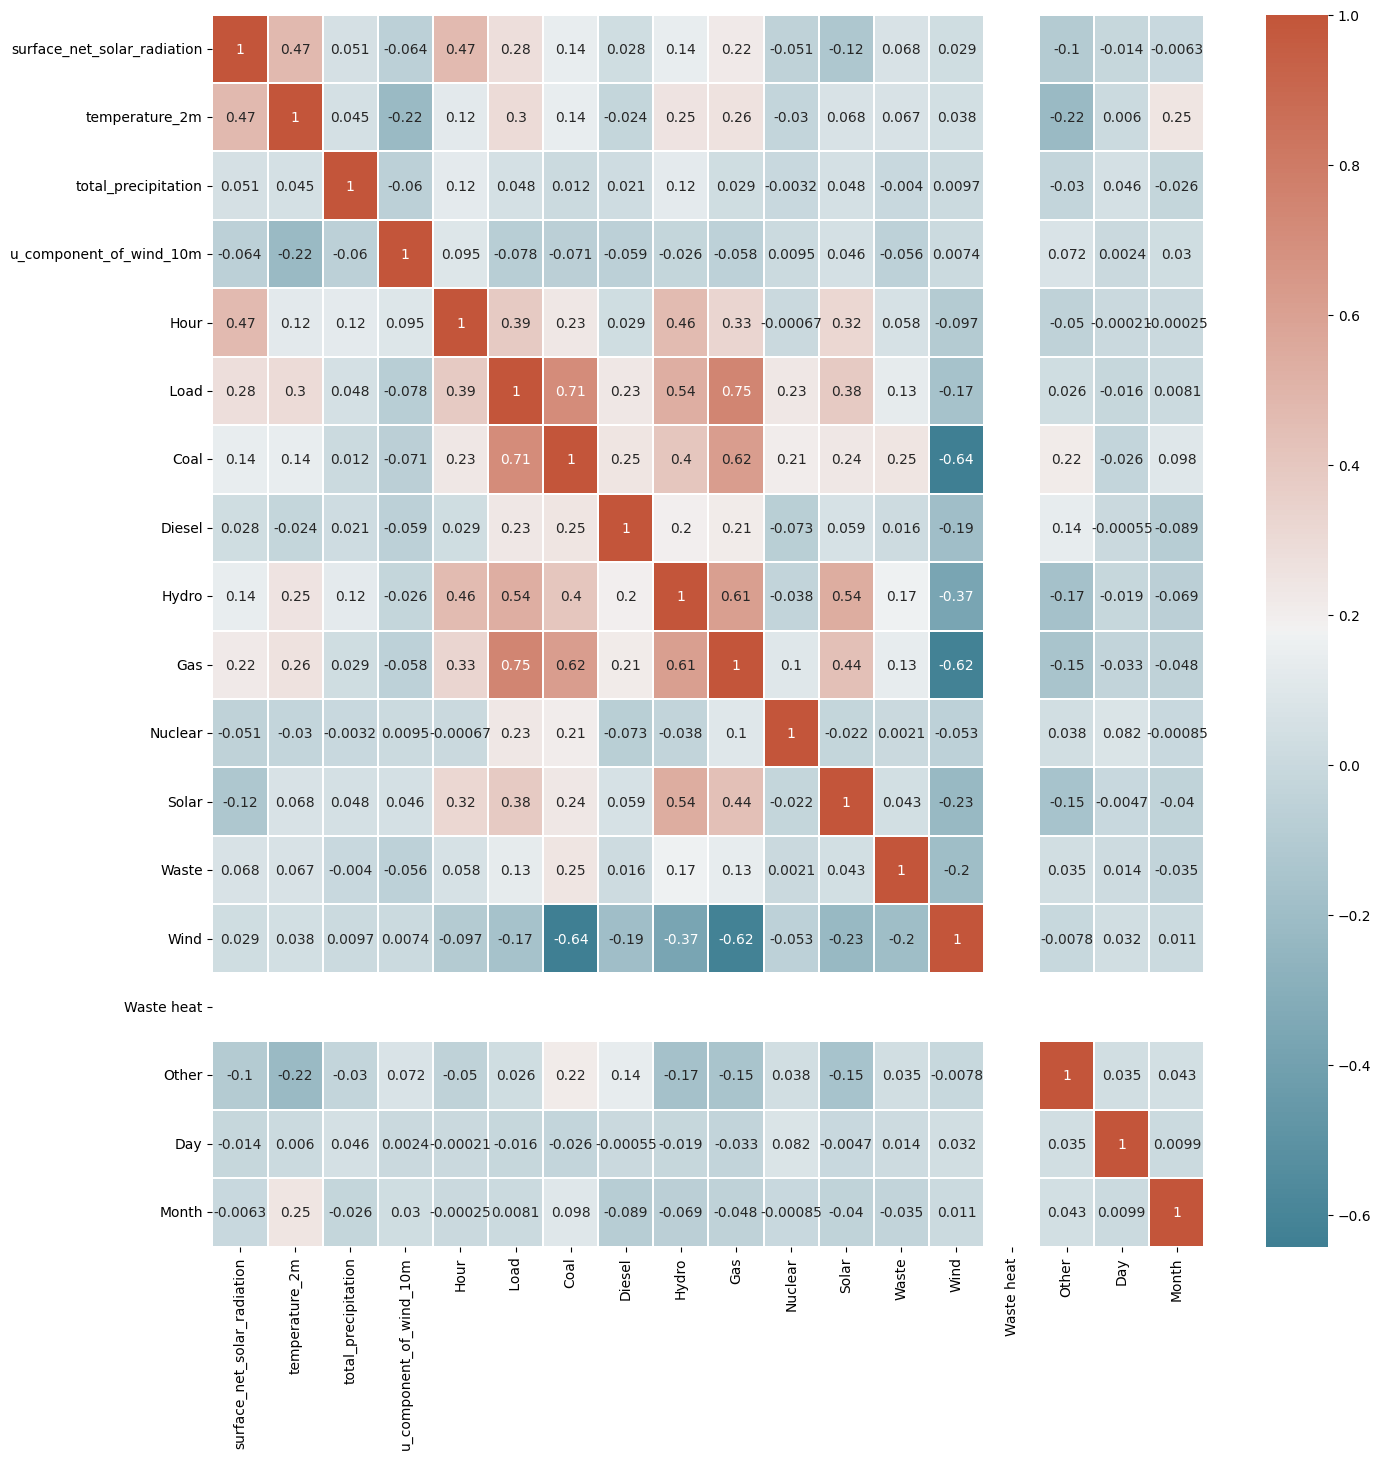

In [ ]:
# calculate correlation matrix
df = pd.DataFrame(data)
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

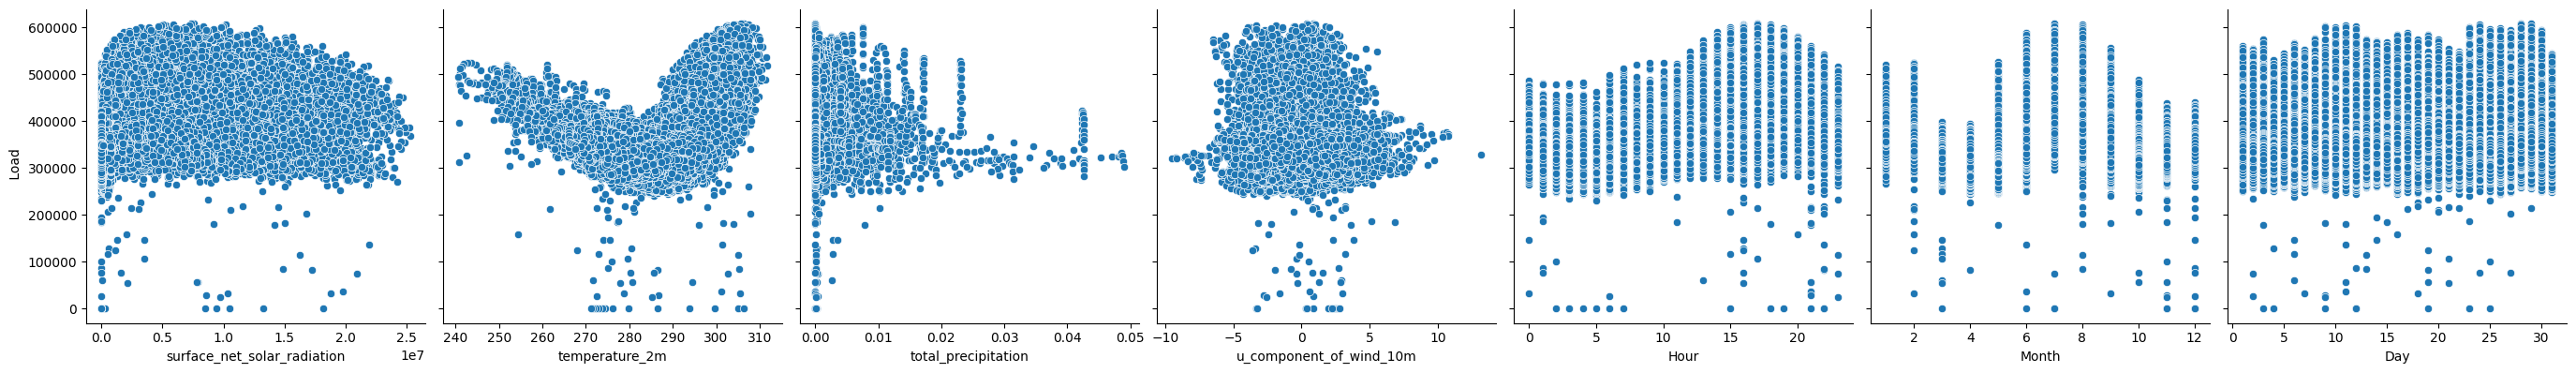

In [ ]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data,
             x_vars=["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"],
             y_vars=' Load', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
columns = ["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"]
X = df[columns]
y = df[' Load']

In [ ]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)"""

In [ ]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_regressor.fit(X_train, y_train) #learn

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test) #predicting

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 480034007.1056144
R-squared: 0.8927578682194051


In [ ]:
rf_rs = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': np.arange(100),
    'max_depth': [None] + list(np.arange(10, 50, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random_search = RandomizedSearchCV(
    rf_rs,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring=make_scorer(mean_squared_error),  # Use mean squared error as the scoring metric
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20, 25, 30,
                                                      35, 40, 45],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring=make_scorer(mean_squared_error), verbose=1)

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
y_pred_rs = best_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rs))
print(f'Root Mean Squared Error on Test Set: {rmse}')
r2 = r2_score(y_test, y_pred_rs)
print(f'R-squared: {r2}')

Root Mean Squared Error on Test Set: 25941.7978469721
R-squared: 0.849653412668861


In [ ]:
import xgboost as xgb

In [ ]:
best_hyperparameters = random_search.best_params_
xgb_regressor = xgb.XGBRegressor(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    learning_rate=0.1,  # You may adjust the learning rate based on your needs
    subsample=0.8,  # You may adjust subsample and other hyperparameters
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_regressor.predict(X_test)

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error with XGBoost: {rmse_xgb}')
r2 = r2_score(y_test, y_pred_xgb)
print(f'R-squared: {r2}')

Root Mean Squared Error with XGBoost: 27155.669006882214
R-squared: 0.8352541640989306


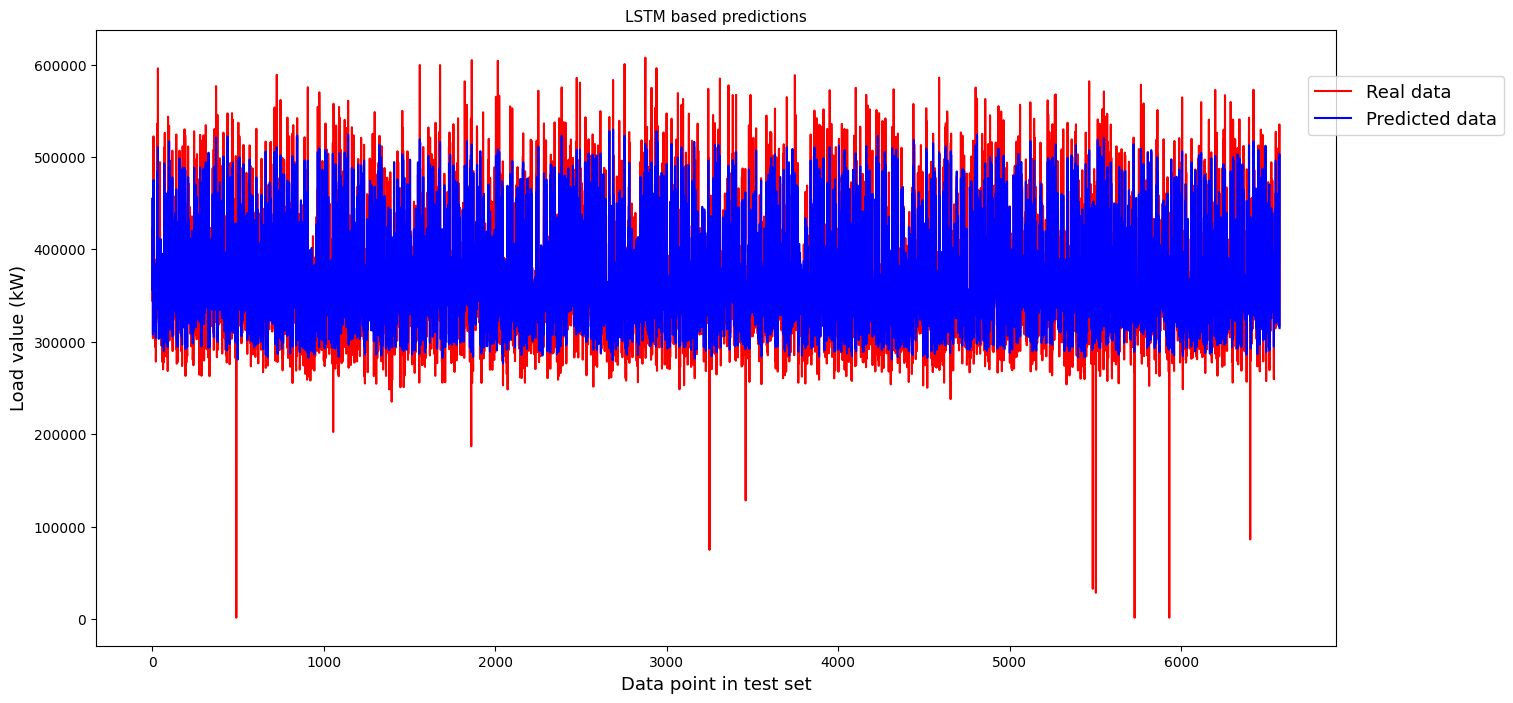

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(np.array(y_test), color = 'red', label = 'Real data')
plt.plot(y_pred_xgb, color = 'blue', label = 'Predicted data')
plt.xlabel('Data point in test set', fontsize=13)
plt.ylabel('Load value (kW)',fontsize=13)
plt.title('LSTM based predictions', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.show()

In [ ]:
#Remaining steps:
#1. Try with a bunch of hyperparameters
#2. Inverse modeling